 ## PPP File 1 of of PPP loans up to 150k

In [46]:
# The different libraries and resources:

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [12]:
# Using note book to run code for the PPP Sources found in this site: https://data.sba.gov/dataset/ppp-foia

import pandas as pd

# Set the file path of the CSV file
file_path_view = "C:/Users/18054/Desktop/DS4A/PPP Sources/public_up_to_150k_1_230331.csv"


# Load the CSV file into a pandas DataFrame
df_1 = pd.read_csv(file_path_view)

# Display the DataFrame
df_1.head()


,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,02/18/2022,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,150775.38,01/13/2022
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,07/16/2021,...,NaN,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,150083.01,06/11/2021
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,09/25/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,141920.11,08/25/2021
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,04/20/2021,...,Limited Liability Company(LLC),19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,137747.78,03/29/2021
4,8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,05/20/2021,...,Non-Profit Organization,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,131876.98,04/27/2021


In [60]:
# Get the number of lenders and the amount from each lender
num_lenders = df_1['OriginatingLender'].nunique()
lender_amounts = df.groupby('OriginatingLender')['InitialApprovalAmount'].sum

# Print the results
print("Number of lenders:", num_lenders)
print("Amount from each lender:")
print(lender_amounts)

Number of lenders: 2039
Amount from each lender:
<bound method GroupBy.sum of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000002D4A7DE8B50>>


### Computing the Original PPP Amount

In [56]:
#Creating an easier and more efficient way to compute the lender amounts for each of the 1-12 PPP Source Files
def compute_lender_amounts(file_path):
    """
    Reads a CSV file containing loan data and computes the total loan amount for each lender.
    
    Args:
        file_path (str): The file path of the CSV file to read.
    
    Returns:
        Object containing the total loan amount for each lender, sorted in descending order.
    """
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Group by 'Lender' and sum 'LoanAmount', then sort by descending order of 'the original loan amount'
    lender_amounts = df.groupby('OriginatingLender')[['InitialApprovalAmount', 'ForgivenessAmount']].sum().sort_values(by='InitialApprovalAmount', ascending=False)

    # Return the lender amounts
    return lender_amounts

file_path = "C:/Users/18054/Desktop/DS4A/PPP Sources/public_up_to_150k_1_230331.csv"
lender_amounts = compute_lender_amounts(file_path)

#Displayin the results of the mounts in a table
print("Amounts by lender in order")
print(lender_amounts)


Amounts by lender in order
                                           InitialApprovalAmount  \
OriginatingLender                                                  
Bank of America, National Association              3866149545.53   
JPMorgan Chase Bank, National Association          2982548533.82   
Wells Fargo Bank, National Association             2384691077.00   
Cross River Bank                                   1240020809.96   
U.S. Bank, National Association                    1173409284.59   
...                                                          ...   
Bank Northwest                                            741.00   
Grow Financial FCU                                        700.00   
Bank of the Panhandle                                     700.00   
The Farmers State Bank                                    656.00   
Aspen Federal Credit Union                                512.00   

                                           ForgivenessAmount  
OriginatingLender        

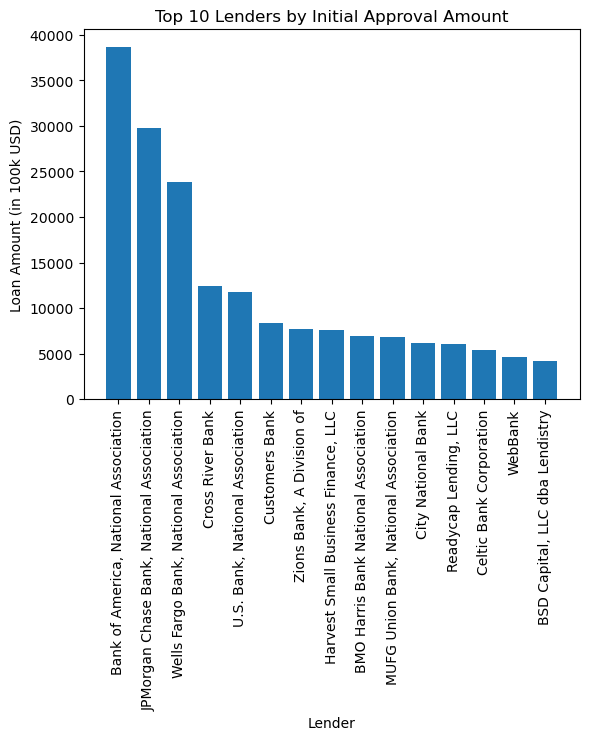


Top Lenders by Approval Amount
                            OriginatingLender  InitialApprovalAmount
0       Bank of America, National Association          3866149545.53
1   JPMorgan Chase Bank, National Association          2982548533.82
2      Wells Fargo Bank, National Association          2384691077.00
3                            Cross River Bank          1240020809.96
4             U.S. Bank, National Association          1173409284.59
5                              Customers Bank           835669388.80
6                   Zions Bank, A Division of           775164564.19
7         Harvest Small Business Finance, LLC           758545657.03
8        BMO Harris Bank National Association           692517818.96
9       MUFG Union Bank, National Association           684829108.48
10                         City National Bank           621615722.23
11                      Readycap Lending, LLC           604021765.01
12                    Celtic Bank Corporation           540127579.28
13

In [57]:

# Showing the top 15 lenders by the initial approval amount
lender_amounts['InitialApprovalAmount_100k'] = lender_amounts['InitialApprovalAmount'] / 100000

top_15_lenders1 = lender_amounts.head(15)

plt.bar(top_15_lenders1.index, top_15_lenders1['InitialApprovalAmount_100k'])
plt.xticks(rotation=90)
plt.xlabel('Lender')
plt.ylabel('Loan Amount (in 100k USD)')
plt.title('Top 15 Lenders by Initial Approval Amount')
plt.show()


# Displaying the top lenders list for Initial Approval Amount
print("\nTop Lenders by Approval Amount")
print(top_15_lenders1[['InitialApprovalAmount']].reset_index())


### Computing the Forgiveness PPP Amount

In [58]:
def compute_forgiveness_amounts(file_path):
    """
    Reads a CSV file containing loan data and computes the total loan amount for each lender.
    
    Args:
        file_path (str): The file path of the CSV file to read.
    
    Returns:
        Object containing the total loan amount for each lender, sorted in descending order.
    """
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Group by 'Lender' and sum 'LoanAmount', then sort by descending order of 'the original loan amount'
    forgiveness_amounts = df.groupby('OriginatingLender')[['InitialApprovalAmount', 'ForgivenessAmount']].sum().sort_values(by='ForgivenessAmount', ascending=False)

    # Return the lender amounts
    return forgiveness_amounts

file_path = "C:/Users/18054/Desktop/DS4A/PPP Sources/public_up_to_150k_1_230331.csv"
forgiveness_amounts = compute_forgiveness_amounts(file_path)

#Displayin the results of the mounts in a table
print("Forgiveness Amounts by lender in order")
print(forgiveness_amounts)

Forgiveness Amounts by lender in order
                                              InitialApprovalAmount  \
OriginatingLender                                                     
Bank of America, National Association                 3866149545.53   
JPMorgan Chase Bank, National Association             2982548533.82   
Wells Fargo Bank, National Association                2384691077.00   
U.S. Bank, National Association                       1173409284.59   
Cross River Bank                                      1240020809.96   
...                                                             ...   
Genesee Co-Op FCU                                           7373.00   
Economic and Community Development Institute               21217.00   
The Farmers State Bank                                       656.00   
Profinium, Inc.                                             7000.00   
Bank of Central Florida                                   107980.00   

                                     

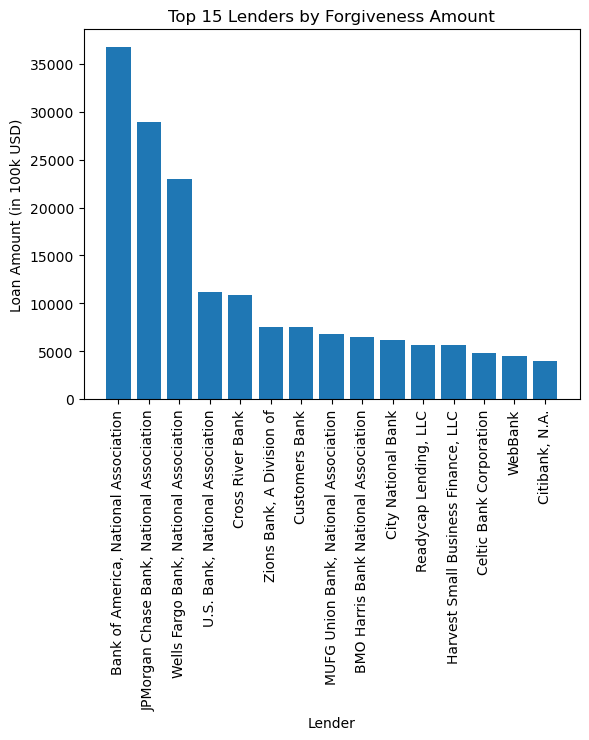


Top Lenders by Forgiveness Amount
                            OriginatingLender  ForgivenessAmount
0       Bank of America, National Association      3676017575.39
1   JPMorgan Chase Bank, National Association      2894946505.25
2      Wells Fargo Bank, National Association      2301837318.38
3             U.S. Bank, National Association      1117877129.53
4                            Cross River Bank      1089098586.19
5                   Zions Bank, A Division of       754779059.17
6                              Customers Bank       749667668.57
7       MUFG Union Bank, National Association       675008208.31
8        BMO Harris Bank National Association       653360379.54
9                          City National Bank       617975308.43
10                      Readycap Lending, LLC       565979314.76
11        Harvest Small Business Finance, LLC       562211699.44
12                    Celtic Bank Corporation       485828941.43
13                                    WebBank       449

In [59]:
# Showing the top 15 lenders by the Forgiveness Amount


forgiveness_amounts['ForgivenessAmount_100k'] = forgiveness_amounts['ForgivenessAmount'] / 100000


top_15_lendersF1 = forgiveness_amounts.head(15)

plt.bar(top_15_lendersF1.index, top_15_lendersF1['ForgivenessAmount_100k'])
plt.xticks(rotation=90)
plt.xlabel('Lender')
plt.ylabel('Loan Amount (in 100k USD)')
plt.title('Top 15 Lenders by Forgiveness Amount')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Displaying the top lenders list
print("\nTop Lenders by Forgiveness Amount")
print(top_15_lendersF1[['ForgivenessAmount']].reset_index())


 ## PPP File 12 of of PPP loans up to 150k

 ### PPP Original Amount of File 12

In [65]:
#Reading File 12
def compute_lender_amounts(file_path):

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Group by 'Lender' and sum 'LoanAmount', then sort by descending order of 'the original loan amount'
    lender_amounts12 = df.groupby('OriginatingLender')[['InitialApprovalAmount', 'ForgivenessAmount']].sum().sort_values(by='InitialApprovalAmount', ascending=False)

    # Return the lender amounts
    return lender_amounts12

file_path = "C:/Users/18054/Desktop/DS4A/PPP Sources/public_up_to_150k_12_230331.csv"
lender_amounts12 = compute_lender_amounts(file_path)

#Displayin the results of the mounts in a table
print("Amounts by lender in order")
print(lender_amounts12.head(15))


Amounts by lender in order
                                           InitialApprovalAmount  \
OriginatingLender                                                  
Bank of America, National Association               749106673.35   
U.S. Bank, National Association                     575735342.53   
JPMorgan Chase Bank, National Association           416546555.05   
Cross River Bank                                    378138952.72   
Umpqua Bank                                         377401824.66   
Wells Fargo Bank, National Association              369926915.00   
Truist Bank                                         345024911.85   
KeyBank National Association                        330335936.10   
BMO Harris Bank National Association                280922505.52   
Atlantic Union Bank                                 272286068.92   
Banner Bank                                         265776387.30   
Associated Bank, National Association               245151648.87   
Nicolet National Bank

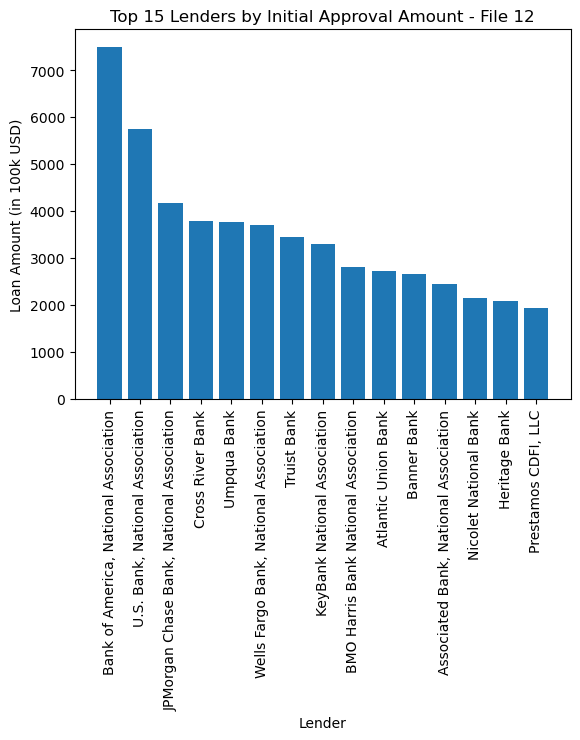


Top Lenders by Approval Amount
                            OriginatingLender  InitialApprovalAmount
0       Bank of America, National Association           749106673.35
1             U.S. Bank, National Association           575735342.53
2   JPMorgan Chase Bank, National Association           416546555.05
3                            Cross River Bank           378138952.72
4                                 Umpqua Bank           377401824.66
5      Wells Fargo Bank, National Association           369926915.00
6                                 Truist Bank           345024911.85
7                KeyBank National Association           330335936.10
8        BMO Harris Bank National Association           280922505.52
9                         Atlantic Union Bank           272286068.92
10                                Banner Bank           265776387.30
11      Associated Bank, National Association           245151648.87
12                      Nicolet National Bank           215663244.97
13

In [66]:

# Showing the top 15 lenders by the initial approval amount
lender_amounts12['InitialApprovalAmount_100k'] = lender_amounts12['InitialApprovalAmount'] / 100000

top_15_lenders12 = lender_amounts12.head(15)

plt.bar(top_15_lenders12.index, top_15_lenders12['InitialApprovalAmount_100k'])
plt.xticks(rotation=90)
plt.xlabel('Lender')
plt.ylabel('Loan Amount (in 100k USD)')
plt.title('Top 15 Lenders by Initial Approval Amount - File 12')
plt.show()


# Displaying the top lenders list for Initial Approval Amount
print("\nTop Lenders by Approval Amount")
print(top_15_lenders12[['InitialApprovalAmount']].reset_index())


### Computing the Forgiveness PPP Amount - File 12

In [69]:
def compute_forgiveness_amounts(file_path):

    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Group by 'Lender' and sum 'LoanAmount', then sort by descending order of 'the original loan amount'
    forgiveness_amounts12 = df.groupby('OriginatingLender')[['InitialApprovalAmount', 'ForgivenessAmount']].sum().sort_values(by='ForgivenessAmount', ascending=False)

    # Return the lender amounts
    return forgiveness_amounts12

file_path = "C:/Users/18054/Desktop/DS4A/PPP Sources/public_up_to_150k_12_230331.csv"
forgiveness_amounts12 = compute_forgiveness_amounts(file_path)

#Displayin the results of the mounts in a table
print("Forgiveness Amounts by lender in order")
print(forgiveness_amounts12)

Forgiveness Amounts by lender in order
                                           InitialApprovalAmount  \
OriginatingLender                                                  
Bank of America, National Association               749106673.35   
U.S. Bank, National Association                     575735342.53   
JPMorgan Chase Bank, National Association           416546555.05   
Umpqua Bank                                         377401824.66   
Wells Fargo Bank, National Association              369926915.00   
...                                                          ...   
Security Federal Bank                                   92600.00   
Community National Bank & Trust                          4500.00   
First United National Bank                               2000.00   
Union Savings Bank                                      62500.00   
First Southwest Bank                                    10900.00   

                                           ForgivenessAmount  
OriginatingLe

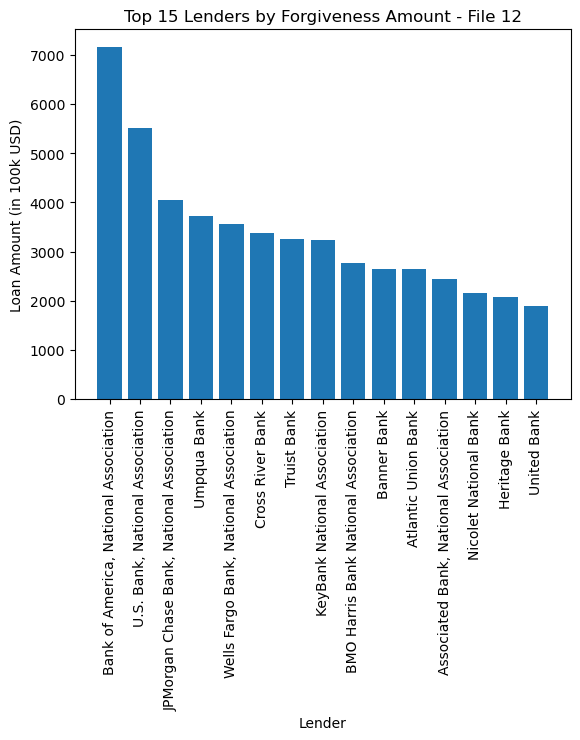


Top Lenders by Forgiveness Amount
                            OriginatingLender  ForgivenessAmount
0       Bank of America, National Association       715834687.85
1             U.S. Bank, National Association       551868775.71
2   JPMorgan Chase Bank, National Association       405831597.98
3                                 Umpqua Bank       371418109.57
4      Wells Fargo Bank, National Association       356091752.03
5                            Cross River Bank       337228597.80
6                                 Truist Bank       325883390.51
7                KeyBank National Association       322730693.74
8        BMO Harris Bank National Association       277265498.08
9                                 Banner Bank       263751881.72
10                        Atlantic Union Bank       263740473.37
11      Associated Bank, National Association       243327589.97
12                      Nicolet National Bank       215647135.78
13                              Heritage Bank       206

In [70]:
# Showing the top 15 lenders by the Forgiveness Amount


forgiveness_amounts12['ForgivenessAmount_100k'] = forgiveness_amounts12['ForgivenessAmount'] / 100000


top_15_lendersF12 = forgiveness_amounts12.head(15)

plt.bar(top_15_lendersF12.index, top_15_lendersF12['ForgivenessAmount_100k'])
plt.xticks(rotation=90)
plt.xlabel('Lender')
plt.ylabel('Loan Amount (in 100k USD)')
plt.title('Top 15 Lenders by Forgiveness Amount - File 12')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Displaying the top lenders list
print("\nTop Lenders by Forgiveness Amount")
print(top_15_lendersF12[['ForgivenessAmount']].reset_index())
